<a href="https://colab.research.google.com/github/Sergio98831/CCN-for-Type-Ia-Gamma-ray-spectra/blob/main/SN_Ia_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificatore di *Type Ia Supernovae*

Le supernovae di tipo Ia sono tra i fenomeni più affascinanti dell'universo, di cui si sa ancora poco. Sono molto importanti perché vengono usate come candele standard per misurare le distanze cosmiche e giocao un ruolo fondamentale nell'arricchimiento dei metalli nell'universo.

Vi sono diversi modelli che descrivono questo tipo di esplosioni. Tuttavia, vista la apparente natura uniforme, uno degli scenari maggiormenti indagati concerne sistemi binari formati da una stella e una compagna degenere (una nana bianca). Questo scenario, pur rimanendo valido, è relativamente raro e non riesce da solo a spiegare la numerosità degli eventi osservati nel cosmo.

Lo scenario alternativo invece prende in considerazione sistemi binari formati da due nane bianche che, secondo diversi meccanismi, vanno incontro a una esplosione termonucleare. Questa tipologia di sistemi binari sarebbe più frequente nel cosmo ripetto al sistema descritto in precedenza.

Principalmente esistono 3 diversi modelli di esplosione di queste supernovae:


1.   Delayed Detonation
2.   Double detonation
3.   Violent Merger



---


Usiamo un Random Tree forest per classificare le supernovae prodotte tramite questa procedure (https://github.com/Sergio98831/Simulation-of-type-Ia-SNe-gamma-ray-spectra/blob/main/sergio_158keV.py). Il mio obbiettivo è classificare i modelli di esplosione delle supernovae di tipo Ia. Vediamo un po' come fare

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
train_sn = pd.read_csv('/content/drive/My Drive/ASTENA_Type_Ia_SN/new_rich.csv')
train_sn.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,energy,flux,snr,FWHM,time,f,distance,model
0,165.513984,0.000103,11.148861,3.791193,17.5,0.535765,3.5,0
1,165.297716,0.000111,10.538209,3.207788,17.5,0.505721,3.5,0
2,165.199529,0.000113,12.370142,3.380254,17.5,0.557162,3.5,0
3,166.661716,0.000108,11.189313,2.932521,17.5,0.529888,3.5,0
4,165.822350,0.000111,11.977576,3.048418,17.5,0.550400,3.5,0


In [2]:
test_sn = pd.read_csv('/content/drive/My Drive/ASTENA_Type_Ia_SN/test.csv')
test_sn.head()

,energy,flux,snr,FWHM,time,f,distance,model
0,165.439450,0.000112,9.457372,3.076514,17.5,0.465589,3.5,0
1,166.343648,0.000111,4.310674,1.749013,17.5,0.229809,3.5,1
2,167.617786,0.000094,2.072707,0.002160,17.5,0.121904,3.5,2


In [14]:
from sklearn.ensemble import RandomForestClassifier
y = train_sn['model']
features = ['flux', 'snr']
X = pd.get_dummies(train_sn[features])
X_test = pd.get_dummies(test_sn[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'flux': test_sn.flux, 'snr': test_sn.snr, 'model': predictions})
output.to_csv('sn_submission.csv', index=False)
print('Submission effettuata')

Submission effettuata


In [15]:
sub_sn = pd.read_csv('sn_submission.csv')
sub_sn.tail()

,flux,snr,model
0,0.000112,9.457372,0
1,0.000111,4.310674,1
2,0.000094,2.072707,2


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(test_sn.model, predictions)

1.0

Vediamo come prevede una supernova nuova

In [18]:
# Esempio di predizione su un nuovo set di dati
nuova_supernova = pd.DataFrame([[ 1.1e-4, 4.5]],
                               columns=features)

predicted_model = model.predict(nuova_supernova)
print('Il modello di esplosione predetto è:')
if predicted_model[0] == 1:
  print('Double Detonation')
elif predicted_model[0] == 0:
  print('Delayed Detonation')
else:
  print('Violent Merge')

Il modello di esplosione predetto è:
Double Detonation


# Come visualizzare i dati?
Usiamo diversi approcci di visualizzazione. Descriviamo i dati per ricavare le caratteristiche dei tre modelli di esplosione.

Text(0, 0.5, 'snr')

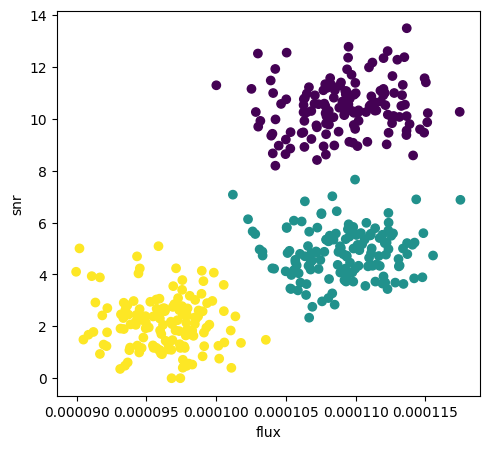

In [19]:
import matplotlib.pyplot as plt
import numpy as np

data = train_sn[features]
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(data.flux, data.snr, c=train_sn.model, cmap='viridis')
plt.xlabel('flux')
plt.ylabel('snr')

Notiamo una grande differenza tra il violente merger model e gli altri due modelli. Questi ultimi possono essere distinti bene solo in base al SNR, per via dell'altezza del picco della riga di emissione attorno a 158 keV.